In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sktime.forecasting.compose import make_reduction
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanSquaredError
from sktime.utils.plotting import plot_series

In [12]:
df = pd.read_csv(r"C:\Users\Anonymous\Desktop\Advance Statistics\Datasets\monthly-milk-production-pounds-p.csv",index_col=0)
idx = pd.to_datetime( df.index ).to_period("M")
df.index = idx

y_train, y_test = temporal_train_test_split(df,test_size=12)
fh = np.arange(1, len(y_test) + 1)
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [13]:
regressor = RandomForestRegressor(random_state=23)

forecaster = make_reduction(regressor, window_length=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
rmse = MeanSquaredError(square_root=True)
print(rmse(y_test, y_pred))



17.746294448888946


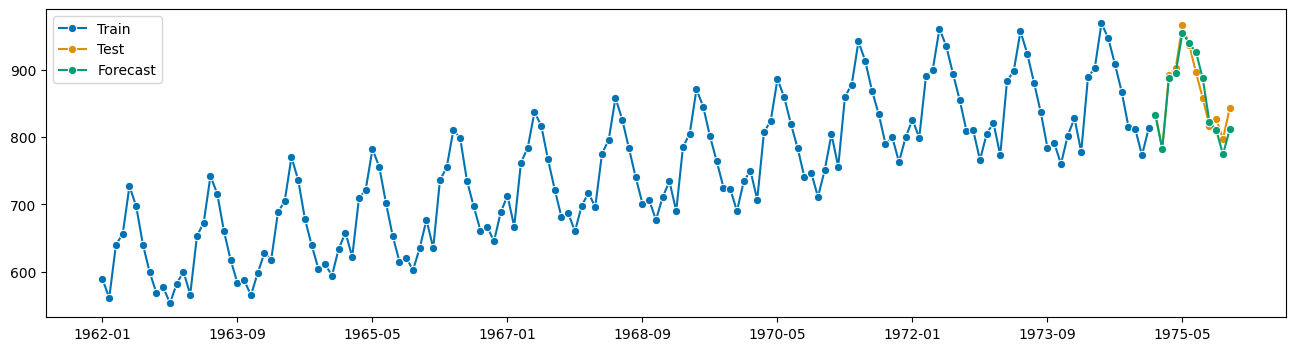

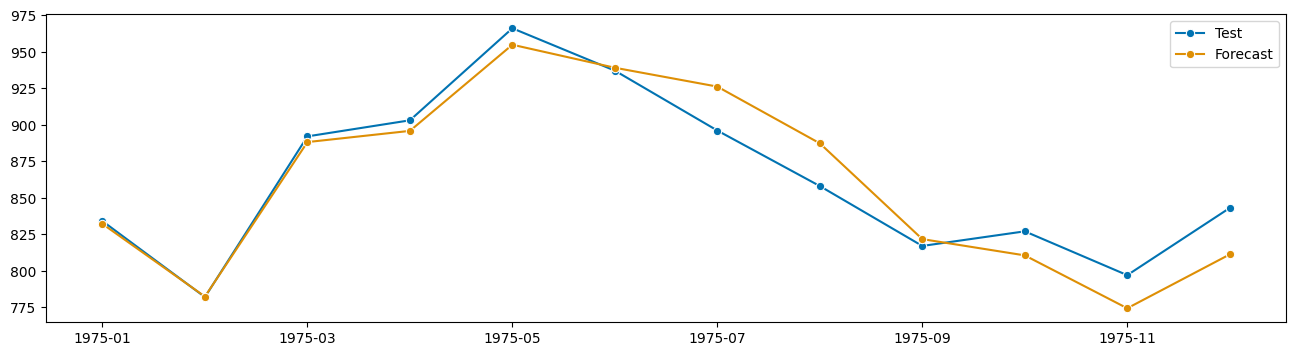

In [14]:
plot_series(y_train,y_test,y_pred , labels=['Train','Test','Forecast'])
plt.show()

plot_series(y_test,y_pred , labels=['Test','Forecast'])
plt.show()



In [15]:
"""## **Basic Grid Search CV**"""

from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import ForecastingGridSearchCV,SlidingWindowSplitter
forecaster = make_reduction(regressor, window_length=10, strategy="recursive")
param_grid = {"window_length": [7,10, 12, 15]}

"""We fit the forecaster on an initial window which is 80% of the historical data then use temporal sliding window cross-validation to find the optimal hyper-parameters

"""

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.9), window_length=20)
gscv = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, param_grid=param_grid)
gscv.fit(y_train)

print(gscv.best_params_)
print(gscv.best_score_)



{'window_length': 7}
0.02423870121968264


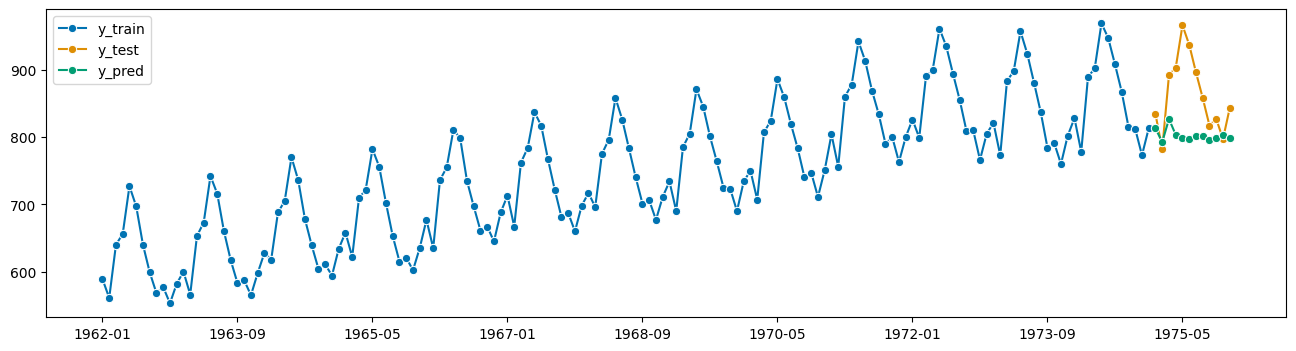

80.39071339402332


In [16]:
y_pred = gscv.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

print(rmse(y_test, y_pred))


In [17]:

"""### **Composite Grid Search C**V"""

forecaster.get_params()

forecaster = make_reduction(regressor, window_length=10, strategy="recursive")
param_grid = {"window_length": [7, 10, 12, 15],
              'estimator__max_features':[3,4,6,7]}
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.9), window_length=20)
gscv = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, param_grid=param_grid)

gscv.fit(y_train)

print(gscv.best_params_)


{'estimator__max_features': 6, 'window_length': 7}


In [18]:
print(gscv.best_score_)

print(rmse(y_test, y_pred))



0.02338393572281707
80.39071339402332


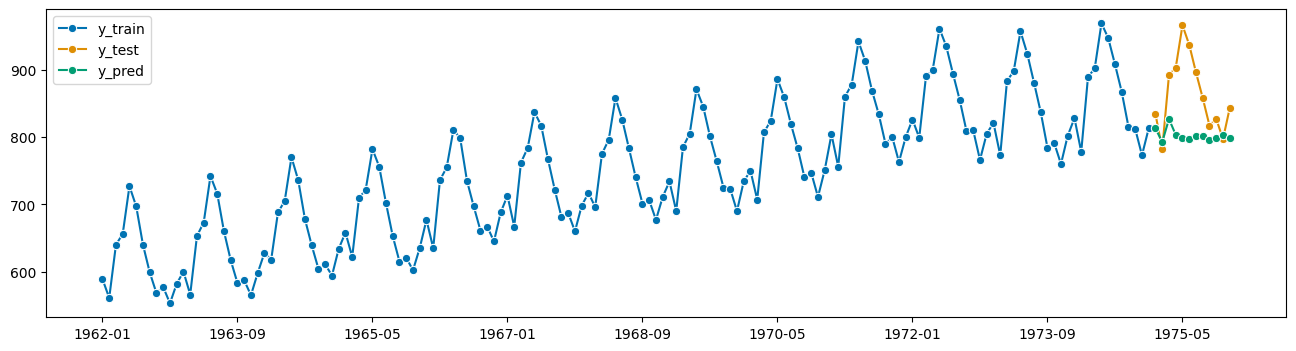

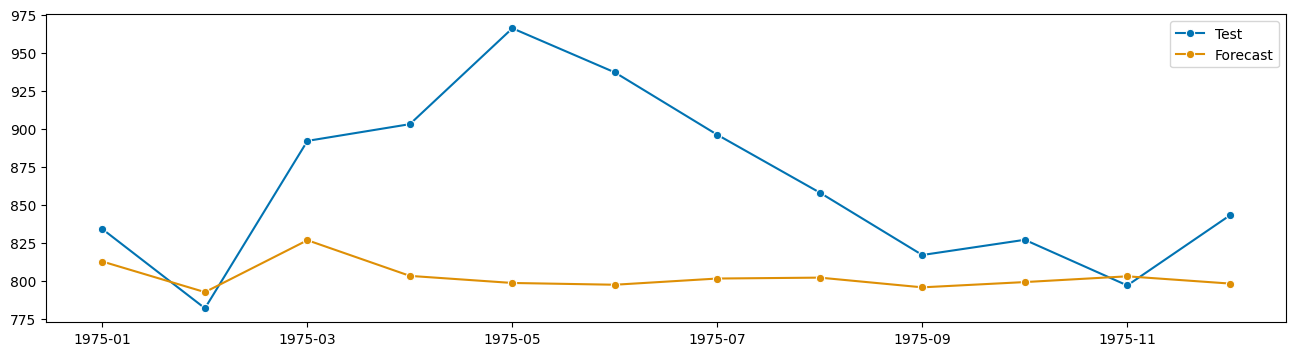

In [19]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

plot_series(y_test,y_pred , labels=['Test','Forecast'])
plt.show()